In [1]:
# Kütüphaneler

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import mean_squared_error , r2_score , confusion_matrix , accuracy_score , roc_auc_score , roc_curve , classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale , StandardScaler     # standardizasoyon işlemleri
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression


from warnings import filterwarnings
filterwarnings("ignore")     # önceki bölümlerde çalıştırdığımızda çıkan gereksiz uyarı mesajları çıkmasın diye

In [2]:
df = pd.read_csv("Veri ve Fotoğraflar\diabetes.csv")
df.head()


# Bağımlı değişkenimiz "Outcome". Yani burada kişi diyabet hastası mı değil mi bunu inceliyoruz. 1, hasta ; 0, hasta değil

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
y = df["Outcome"]

x = df.drop(["Outcome"] , axis=1)

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.30 , random_state=42)

# MODEL

In [4]:
gbm_model = GradientBoostingClassifier().fit(x_train , y_train)

In [6]:
?gbm_model

Type:        GradientBoostingClassifier
String form: GradientBoostingClassifier()
Length:      100
File:        c:\python312\lib\site-packages\sklearn\ensemble\_gb.py
Docstring:  
Gradient Boosting for classification.

This algorithm builds an additive model in a forward stage-wise fashion; it
allows for the optimization of arbitrary differentiable loss functions. In
each stage ``n_classes_`` regression trees are fit on the negative gradient
of the loss function, e.g. binary or multiclass log loss. Binary
classification is a special case where only a single regression tree is
induced.

:class:`sklearn.ensemble.HistGradientBoostingClassifier` is a much faster
variant of this algorithm for intermediate datasets (`n_samples >= 10_000`).

Read more in the :ref:`User Guide <gradient_boosting>`.

Parameters
----------
loss : {'log_loss', 'exponential'}, default='log_loss'
    The loss function to be optimized. 'log_loss' refers to binomial and
    multinomial deviance, the same as used in lo

# TAHMİN

In [5]:
y_pred = gbm_model.predict(x_test)

accuracy_score(y_test , y_pred)

0.7489177489177489

# MODEL TUNING (DOĞRULAMA)

In [7]:
gbm = GradientBoostingClassifier()

In [8]:
gbm_params = {"learning_rate": [0.1 , 0.01 , 0.001 , 0.05] , "n_estimators": [100 , 300 , 500 ,1000] , "max_depth": [2,3,5,8]}

In [10]:
gbm_cv_model = GridSearchCV(gbm , gbm_params , cv=10 , n_jobs=-1 , verbose=2).fit(x_train , y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


In [11]:
gbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}

In [14]:
# Final Modelimiz

gbm_tuned = GradientBoostingClassifier(learning_rate=0.01 , max_depth=5 , n_estimators=500).fit(x_train , y_train)

In [18]:
y_pred = gbm_tuned.predict(x_test)

accuracy_score(y_test , y_pred)

0.7316017316017316

# DEĞİŞKEN ÖNEM SIRASI

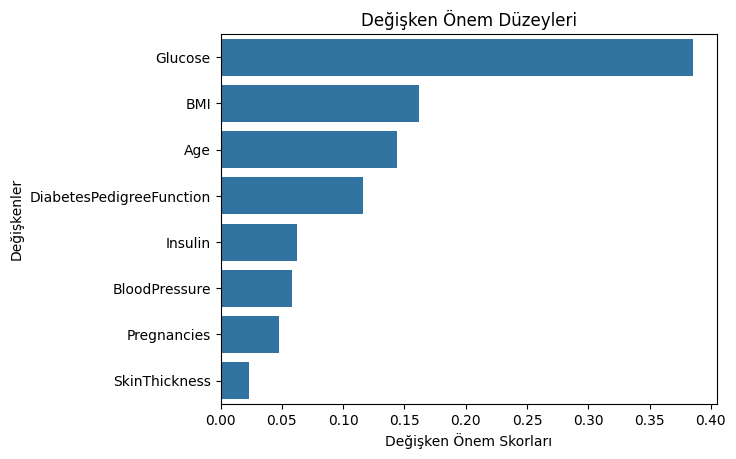

In [19]:
featue_imp = pd.Series(gbm_tuned.feature_importances_ , index=x_train.columns).sort_values(ascending=False)

sns.barplot(x=featue_imp , y=featue_imp.index)
plt.xlabel("Değişken Önem Skorları")
plt.ylabel("Değişkenler")
plt.title("Değişken Önem Düzeyleri")
plt.show()